## Time Series Single

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import statsmodels.api as sm


from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 16, 6
%matplotlib inline

In [2]:
df = pd.read_pickle('data/train.pkl')
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 18288 entries, 2012-08-25 00:00:00 to 2014-09-25 23:00:00
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Count   18288 non-null  int64
 1   year    18288 non-null  int64
 2   month   18288 non-null  int64
 3   day     18288 non-null  int64
 4   Hour    18288 non-null  int64
dtypes: int64(5)
memory usage: 857.2 KB


In [3]:
df.index.min()

Timestamp('2012-08-25 00:00:00')

In [4]:
df.index.max()

Timestamp('2014-09-25 23:00:00')

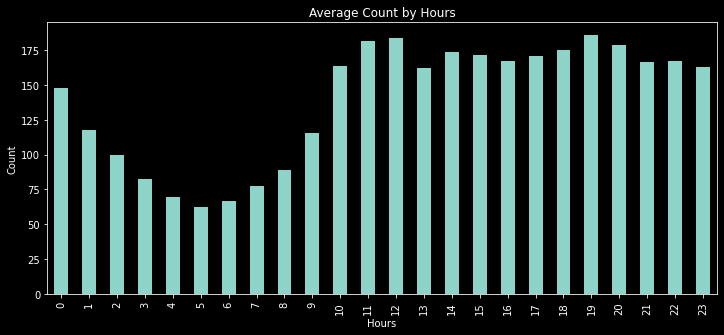

In [5]:
plt.style.use('dark_background')
df \
    .reset_index()\
    .groupby('Hour')['Count']\
    .mean() \
    .plot(kind = 'bar', title = 'Average Count by Hours', ylabel = 'Count', xlabel = 'Hours', figsize=(12,5)) 
plt.show()

### Train/Test Split 

In [6]:
train=df.loc['2012-08-25':'2014-06-24'] 
valid=df.loc['2014-06-25':'2014-09-25']

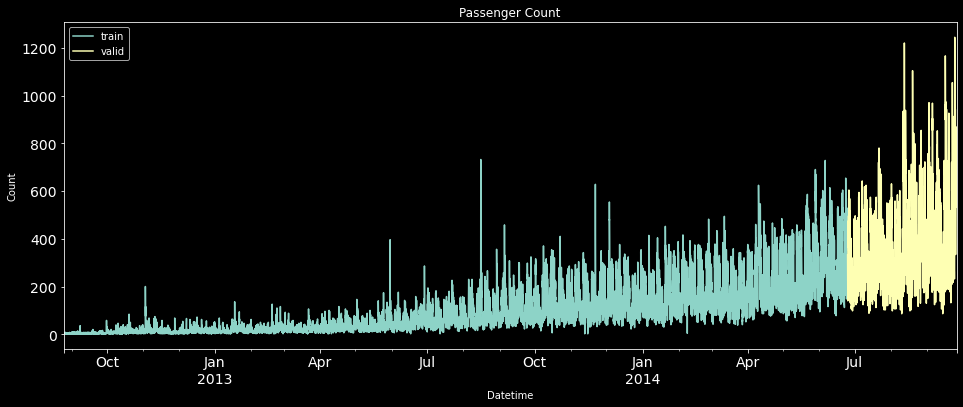

In [7]:
train.Count.plot(figsize=(16,6), title= 'Passenger Count', fontsize=14, 
                 label='train', xlabel = "Datetime", ylabel = "Count") 
valid.Count.plot(figsize=(16,6), label='valid')  
plt.legend(loc='best')
plt.show()

### Moving Average

**Rolling Window Average**: The average is calculated for a window of $k$ previous points.

$$ MA_t = \frac{1}{k} \sum^{n}_{n-k} y_k. $$

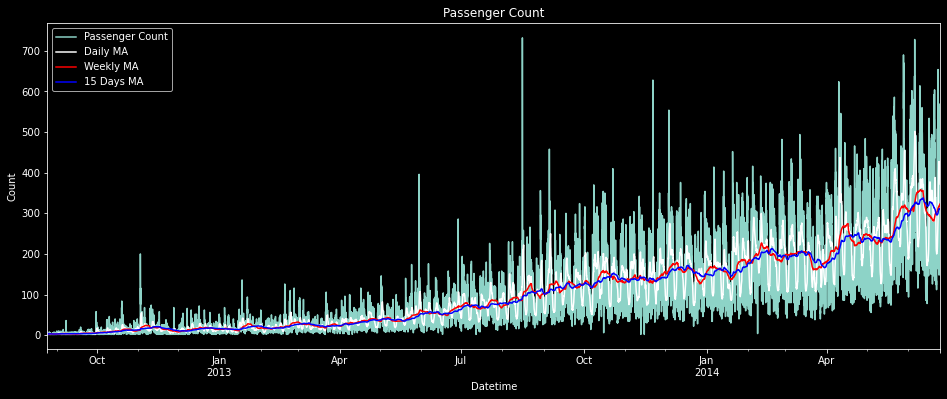

In [8]:
train.Count.plot(label='Passenger Count', ylabel='Count', xlabel='Datetime', title ='Passenger Count', figsize=(16,6))
train.Count.rolling('D').mean().plot(label = 'Daily MA', color = 'white')
train.Count.rolling('7D').mean().plot(label = 'Weekly MA', color = 'red')
train.Count.rolling('15D').mean().plot(label = '15 Days MA', color = 'blue')
plt.legend(loc='best')
plt.show()

Simple Moving Average weaknesses.
* Smaller windows will lead to more noise
* It will always lag by the size of the window
* It will never reach to full peak or valley of the data due to the averaging.
* Does not really inform us about possible future behaviour, it just describes trends in your data.
* Extreme historical values can skew your Simple Moving Average significantly

### Exponential Weighted Moving Average

**Exponential Weighted Moving Average**: The average includes all points, but they are weighted using an exponential decay. However, values further in the past contribute less to the moving average than recent points. 

$$ EMA_t = \alpha y_t + (1 - \alpha) EMA_{t-1}, $$

$\alpha$ ranges from 0 to 1 and scales the strength of the contribution of past values. 

$$ \alpha = 1 - \exp\left[-\frac{\ln(2)}{t_{1/2}}\right], $$

$t_{1/2}$ is the half-life. 

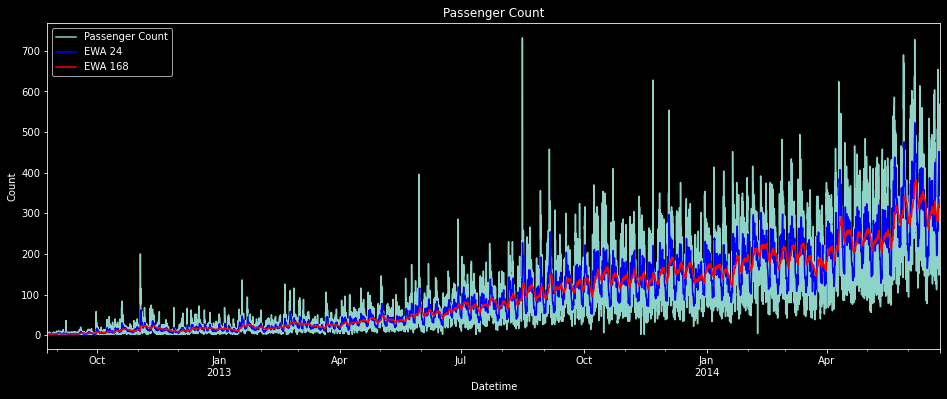

In [9]:
train.Count.plot(label='Passenger Count', ylabel='Count', xlabel='Datetime', title ='Passenger Count', figsize=(16,6))
train.Count.ewm(span = 24).mean().plot(label = 'EWA 24', color = 'blue')
train.Count.ewm(span = 168).mean().plot(label = 'EWA 168', color = 'red')

plt.legend(loc='best')
plt.show()